# Exploratory/ Explanatory Data Analysis

In this notebook we first explored the Kickstarter data set that received via SQL from a postgres database elsewhere. After the exploration we generated explanatory graphs to display the most important information that we could extract from the data set. Finally, we cleaned the data set and prepared it for modelling. In the end of this notebook, we exported the finally cleaned data sets as csv file to be used for modelling in other notebooks.

In [1]:
# !make setup

In [2]:
# !source .venv/bin/activate

## Importing the files


In [3]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# read in the kickstarter csv files
df = pd.read_csv("data/kickstarter_projects.csv")

In [5]:
df.head()

ID                                               Name   
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       Category   Subcategory        Country             Launched    Deadline   
0       Fashion       Fashion  United States  2009-04-21 21:02:48  2009-05-31  \
1  Film & Video        Shorts  United States  2009-04-23 00:07:53  2009-07-20   
2           Art  Illustration  United States  2009-04-24 21:52:03  2009-05-03   
3    Technology      Software  United States  2009-04-25 17:36:21  2009-07-14   
4       Fashion       Fashion  United States  2009-04-27 14:10:39  2009-05-26   

    Goal  Pledged  Backers       State  
0   1000      625       30      Failed  
1  80000       22        3      Failed  
2     20       35        3  Successful  
3     99      145       25  Successful  
4   1900      387       10      Failed

In [6]:
df.columns=df.columns.str.lower()

In [7]:
df.head()

id                                               name   
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       category   subcategory        country             launched    deadline   
0       Fashion       Fashion  United States  2009-04-21 21:02:48  2009-05-31  \
1  Film & Video        Shorts  United States  2009-04-23 00:07:53  2009-07-20   
2           Art  Illustration  United States  2009-04-24 21:52:03  2009-05-03   
3    Technology      Software  United States  2009-04-25 17:36:21  2009-07-14   
4       Fashion       Fashion  United States  2009-04-27 14:10:39  2009-05-26   

    goal  pledged  backers       state  
0   1000      625       30      Failed  
1  80000       22        3      Failed  
2     20       35        3  Successful  
3     99      145       25  Successful  
4   1900      387       10      Failed

In [8]:
df.shape


(374853, 11)

In [9]:
# getting information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           374853 non-null  int64 
 1   name         374853 non-null  object
 2   category     374853 non-null  object
 3   subcategory  374853 non-null  object
 4   country      374853 non-null  object
 5   launched     374853 non-null  object
 6   deadline     374853 non-null  object
 7   goal         374853 non-null  int64 
 8   pledged      374853 non-null  int64 
 9   backers      374853 non-null  int64 
 10  state        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


### Conclusion
- there are no missing values for any of the features
- both, the launch and deadline dates are objects, they need to be transferred to datetime objects

In [10]:
# checking if projects have double entries, which is not the case
df["id"].duplicated().value_counts()


id
False    374853
Name: count, dtype: int64

In [11]:
# yet, there are projects with the same name. Perhaps they run the same capaign again after it failed?
df["name"].duplicated().value_counts()

name
False    372061
True       2792
Name: count, dtype: int64

In [12]:
# just for curiosity, checking what is it about the projects with the same name
df[df["name"].duplicated()]

id                                               name   
6252    1705926108                                 NIJINSKY IN ASYLUM  \
11959    608777297                                     MATTE Magazine   
13004    903412916                                The Busking Project   
14428   1511162166                                  The Fears Project   
15562   1402922171                                               Spin   
...            ...                                                ...   
374625   192967537                                         Short Film   
374669  2080425836  PerfectCombination: Help Us Turn The Dating Wo...   
374672  1442880158                                           Solstice   
374755  1812821305                                  100 Little Loaves   
374814  2014110047                                      Peace of Mind   

            category   subcategory         country             launched   
6252         Theater       Theater   United States  2010-08-04 07:04:52  \
11959    Photography   Photography   United States  2011-01-04 01:47:23   
13004   Film & Video   Documentary   United States  2011-01-24 21:56:28   
14428   Film & Video        Shorts   United States  2011-02-16 01:34:20   
15562   Film & Video  Film & Video   United States  2011-03-04 22:45:04   
...              ...           ...             ...                  ...   
374625  Film & Video  Film & Video   United States  2017-12-29 19:07:22   
374669    Technology           Web  United Kingdom  2017-12-30 17:41:08   
374672    Publishing       Fiction  United Kingdom  2017-12-30 19:33:00   
374755           Art     Sculpture   United States  2018-01-01 07:24:18   
374814    Technology           Web  United Kingdom  2018-01-02 00:29:26   

          deadline   goal  pledged  backers       state  
6252    2010-09-01   2000     2021       46  Successful  
11959   2011-03-02    300      301        7  Successful  
13004   2011-03-09   3000     3278       44  Successful  
14428   2011-03-18    500      550        8  Successful  
15562   2011-04-04   5000       50        2      Failed  
...            ...    ...      ...      ...         ...  
374625  2018-01-28   5000        0        0        Live  
374669  2018-01-29  13640        0        0        Live  
374672  2018-01-29   4092       79        2        Live  
374755  2018-01-31   1000      745        6        Live  
374814  2018-02-01  47739        0        0        Live  

[2792 rows x 11 columns]

In [13]:
# This one was succesful in two different categories
df[df.name == "NIJINSKY IN ASYLUM"]

id                name category      subcategory        country   
5146   338416508  NIJINSKY IN ASYLUM      Art  Performance Art  United States  \
6252  1705926108  NIJINSKY IN ASYLUM  Theater          Theater  United States   

                 launched    deadline  goal  pledged  backers       state  
5146  2010-07-04 17:18:41  2010-07-20  2000     2000        9  Successful  
6252  2010-08-04 07:04:52  2010-09-01  2000     2021       46  Successful

In [14]:
# these seemed to be two different projects, but just had a very general name
df[df.name == "Short Film"]

id        name      category   subcategory        country   
221576  1501180783  Short Film  Film & Video  Film & Video         Sweden  \
374625   192967537  Short Film  Film & Video  Film & Video  United States   

                   launched    deadline  goal  pledged  backers   state  
221576  2015-05-07 08:42:02  2015-06-06   366      116        7  Failed  
374625  2017-12-29 19:07:22  2018-01-28  5000        0        0    Live

## Missing values
Check missing values. Just to be sure

In [15]:
# displays sum of missing values per column
df.isnull().sum()

id             0
name           0
category       0
subcategory    0
country        0
launched       0
deadline       0
goal           0
pledged        0
backers        0
state          0
dtype: int64

In [16]:
# change the launch and deadline date to datetime object and use them to generate the new feature duration_days, which has more information to it
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
df['duration_days']=(df["deadline"]-df["launched"]).dt.days
df['launched'] = df['launched'].dt.date

In [17]:
df.head()

id                                               name   
0  1860890148  Grace Jones Does Not Give A F$#% T-Shirt (limi...  \
1   709707365                     CRYSTAL ANTLERS UNTITLED MOVIE   
2  1703704063                                drawing for dollars   
3      727286                       Offline Wikipedia iPhone app   
4  1622952265                                         Pantshirts   

       category   subcategory        country    launched   deadline   goal   
0       Fashion       Fashion  United States  2009-04-21 2009-05-31   1000  \
1  Film & Video        Shorts  United States  2009-04-23 2009-07-20  80000   
2           Art  Illustration  United States  2009-04-24 2009-05-03     20   
3    Technology      Software  United States  2009-04-25 2009-07-14     99   
4       Fashion       Fashion  United States  2009-04-27 2009-05-26   1900   

   pledged  backers       state  duration_days  
0      625       30      Failed             39  
1       22        3      Failed             87  
2       35        3  Successful              8  
3      145       25  Successful             79  
4      387       10      Failed             28

In [18]:
# since the state is the feature that we want to use as a target, we want to see how balanced our dataset is. You can already see that we have 5 different states, of which canceled, live and suspended
# are not really interesting for us, because they are not really predictable. We are only interested to see projects that fail or are successful. Here the dataset is also not really balanced at first glance
df.state.value_counts()

state
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [19]:
# it seems that most projects come from the US
df.country.value_counts()

country
United States     292618
United Kingdom     33671
Canada             14756
Australia           7839
Germany             4171
France              2939
Italy               2878
Netherlands         2868
Spain               2276
Sweden              1757
Mexico              1752
New Zealand         1447
Denmark             1113
Ireland              811
Switzerland          760
Norway               708
Hong Kong            618
Belgium              617
Austria              597
Singapore            555
Luxembourg            62
Japan                 40
Name: count, dtype: int64

In [20]:
# we dropped the ID column, because it is no feature that use for our modelling
df.drop("id",inplace=True, axis=1)

In [21]:
# as stated above we keep only projects that had the state Failed of Successful
filtered_df = df[df['state'].isin(['Successful', 'Failed'])]
filtered_df.head()

name      category   
0  Grace Jones Does Not Give A F$#% T-Shirt (limi...       Fashion  \
1                     CRYSTAL ANTLERS UNTITLED MOVIE  Film & Video   
2                                drawing for dollars           Art   
3                       Offline Wikipedia iPhone app    Technology   
4                                         Pantshirts       Fashion   

    subcategory        country    launched   deadline   goal  pledged   
0       Fashion  United States  2009-04-21 2009-05-31   1000      625  \
1        Shorts  United States  2009-04-23 2009-07-20  80000       22   
2  Illustration  United States  2009-04-24 2009-05-03     20       35   
3      Software  United States  2009-04-25 2009-07-14     99      145   
4       Fashion  United States  2009-04-27 2009-05-26   1900      387   

   backers       state  duration_days  
0       30      Failed             39  
1        3      Failed             87  
2        3  Successful              8  
3       25  Successful             79  
4       10      Failed             28

In [22]:
# we figured out that it might be interesting to see, if the year of the project have an influence on the success
filtered_df['year'] = pd.DatetimeIndex(filtered_df['launched']).year

/var/folders/mj/p0ky4l_n539cg65klcpvtc880000gn/T/ipykernel_67015/3482451647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = pd.DatetimeIndex(filtered_df['launched']).year


In [23]:
filtered_df.head()

name      category   
0  Grace Jones Does Not Give A F$#% T-Shirt (limi...       Fashion  \
1                     CRYSTAL ANTLERS UNTITLED MOVIE  Film & Video   
2                                drawing for dollars           Art   
3                       Offline Wikipedia iPhone app    Technology   
4                                         Pantshirts       Fashion   

    subcategory        country    launched   deadline   goal  pledged   
0       Fashion  United States  2009-04-21 2009-05-31   1000      625  \
1        Shorts  United States  2009-04-23 2009-07-20  80000       22   
2  Illustration  United States  2009-04-24 2009-05-03     20       35   
3      Software  United States  2009-04-25 2009-07-14     99      145   
4       Fashion  United States  2009-04-27 2009-05-26   1900      387   

   backers       state  duration_days  year  
0       30      Failed             39  2009  
1        3      Failed             87  2009  
2        3  Successful              8  2009  
3       25  Successful             79  2009  
4       10      Failed             28  2009

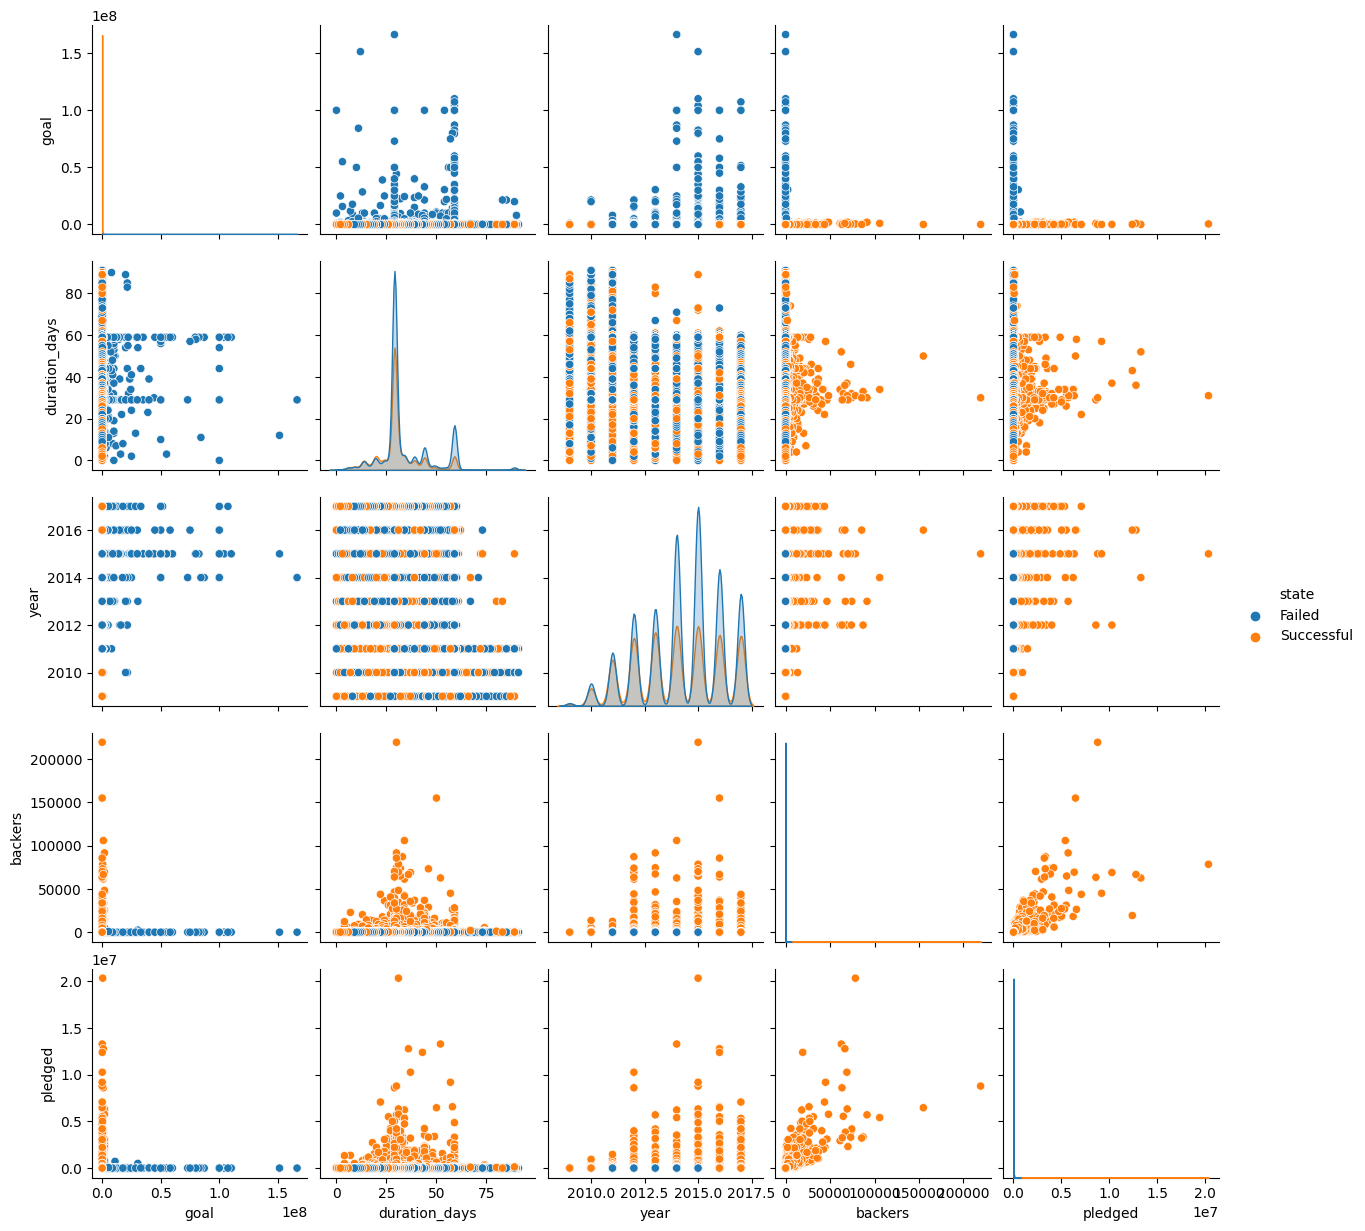

In [24]:
# generation of a correlation matrix to see the influence that the numerical values have on each other
sns.pairplot(filtered_df[['goal', 'duration_days', 'year', 'state', 'backers', 'pledged']], hue='state')
plt.show()

## Interpretation of the pairplot
- correlation between backers and pledged (makes sense, because the more backers the higher the pledge will be in the end)
- there also seems to be somewhat of a correlation between duration days and pledged/backers, which also makes a lot of sense. The longer the project takes the more people have the chance to see it
- is there an anti-correlation between the goal and the backers (as well as with the success rate)?

In [25]:
corr_columns = ['goal', 'duration_days', 'year']
corr_mtrx = filtered_df[corr_columns].corr()
corr_mtrx

goal  duration_days      year
goal           1.000000       0.021611  0.012334
duration_days  0.021611       1.000000 -0.171237
year           0.012334      -0.171237  1.000000

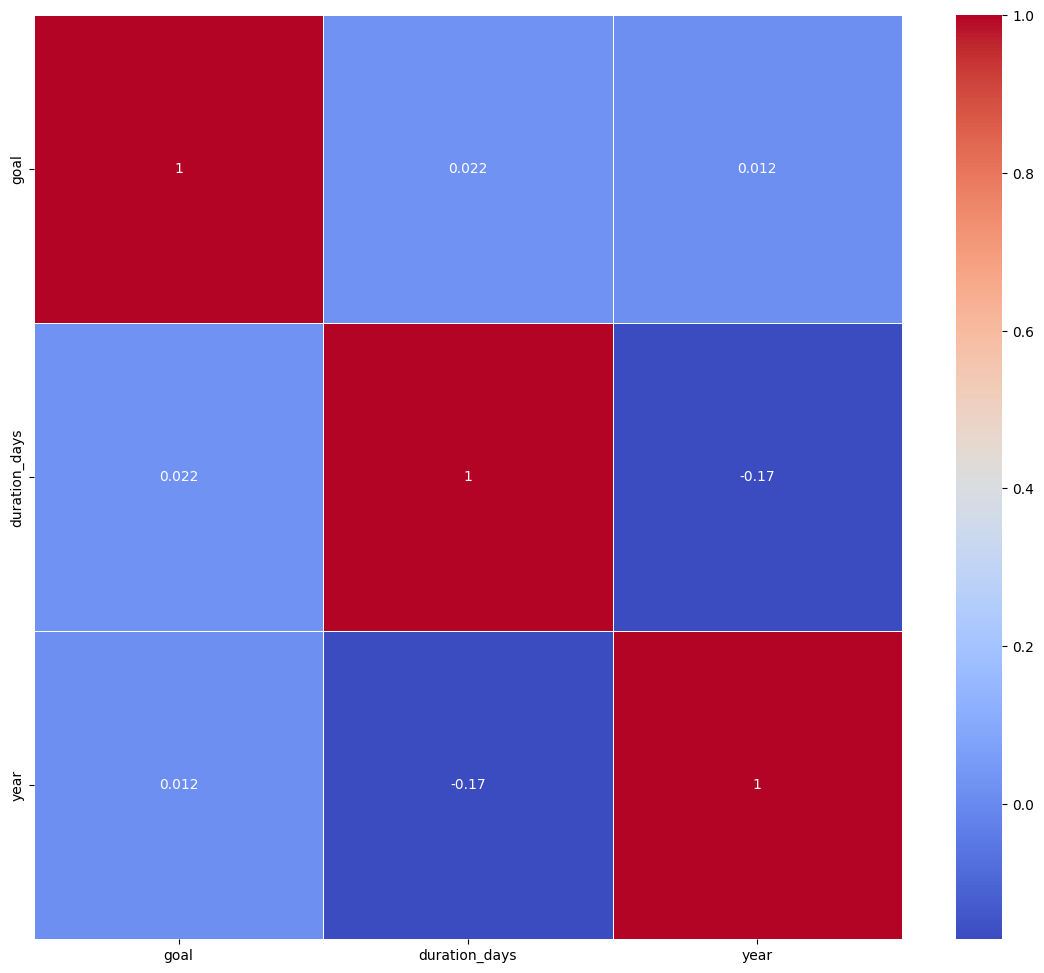

In [26]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr_mtrx, linewidths=0.5, annot=True, cmap= 'coolwarm')

In [27]:
# how is the spread across the categories? Most projects are found in the categories Film & Video and Music
fig = px.histogram(filtered_df, x='category')
fig.show()

In [28]:
# After seeing in which categories the most projects were aired, we wanted to know how the successrate looks like among the categories
df_group_cat = filtered_df.groupby(['category','state']).count().reset_index()
df_group_cat

category       state   name  subcategory  country  launched  deadline   
0            Art      Failed  14130        14130    14130     14130     14130  \
1            Art  Successful  11510        11510    11510     11510     11510   
2         Comics      Failed   4036         4036     4036      4036      4036   
3         Comics  Successful   5842         5842     5842      5842      5842   
4         Crafts      Failed   5703         5703     5703      5703      5703   
5         Crafts  Successful   2115         2115     2115      2115      2115   
6          Dance      Failed   1235         1235     1235      1235      1235   
7          Dance  Successful   2338         2338     2338      2338      2338   
8         Design      Failed  14814        14814    14814     14814     14814   
9         Design  Successful  10549        10549    10549     10549     10549   
10       Fashion      Failed  14181        14181    14181     14181     14181   
11       Fashion  Successful   5593         5593     5593      5593      5593   
12  Film & Video      Failed  32891        32891    32891     32891     32891   
13  Film & Video  Successful  23612        23612    23612     23612     23612   
14          Food      Failed  15969        15969    15969     15969     15969   
15          Food  Successful   6085         6085     6085      6085      6085   
16         Games      Failed  16002        16002    16002     16002     16002   
17         Games  Successful  12518        12518    12518     12518     12518   
18    Journalism      Failed   3136         3136     3136      3136      3136   
19    Journalism  Successful   1012         1012     1012      1012      1012   
20         Music      Failed  21696        21696    21696     21696     21696   
21         Music  Successful  24105        24105    24105     24105     24105   
22   Photography      Failed   6384         6384     6384      6384      6384   
23   Photography  Successful   3305         3305     3305      3305      3305   
24    Publishing      Failed  23113        23113    23113     23113     23113   
25    Publishing  Successful  12300        12300    12300     12300     12300   
26    Technology      Failed  20613        20613    20613     20613     20613   
27    Technology  Successful   6433         6433     6433      6433      6433   
28       Theater      Failed   3708         3708     3708      3708      3708   
29       Theater  Successful   6534         6534     6534      6534      6534   

     goal  pledged  backers  duration_days   year  
0   14130    14130    14130          14130  14130  
1   11510    11510    11510          11510  11510  
2    4036     4036     4036           4036   4036  
3    5842     5842     5842           5842   5842  
4    5703     5703     5703           5703   5703  
5    2115     2115     2115           2115   2115  
6    1235     1235     1235           1235   1235  
7    2338     2338     2338           2338   2338  
8   14814    14814    14814          14814  14814  
9   10549    10549    10549          10549  10549  
10  14181    14181    14181          14181  14181  
11   5593     5593     5593           5593   5593  
12  32891    32891    32891          32891  32891  
13  23612    23612    23612          23612  23612  
14  15969    15969    15969          15969  15969  
15   6085     6085     6085           6085   6085  
16  16002    16002    16002          16002  16002  
17  12518    12518    12518          12518  12518  
18   3136     3136     3136           3136   3136  
19   1012     1012     1012           1012   1012  
20  21696    21696    21696          21696  21696  
21  24105    24105    24105          24105  24105  
22   6384     6384     6384           6384   6384  
23   3305     3305     3305           3305   3305  
24  23113    23113    23113          23113  23113  
25  12300    12300    12300          12300  12300  
26  20613    20613    20613          20613  20613  
27   6433     6433     6433           64

In [29]:
fig = px.bar(df_group_cat, x='name', y='category', color='state', title= 'Outcome of Kickstarter projects per category')
fig.update_yaxes(title_text = '', tickangle = 0, tickmode='linear')
fig.update_xaxes(title_text = 'Amount of projects')
fig.update_layout(legend_title_text = 'outcome')
fig.update_layout(title_x = 0.5, width = 1300)
fig.show()

## Interpretation
- there are some categories that seem a bit more successful then other: Music for example
- some others seem less successful, but since it is hart to read from this graph, we wanted a percent success

In [30]:
# define a function to calculate the percents
df_cat_percents = pd.DataFrame()

cat_list = []

percent_list = []

def calculate_percent(category, df, column, cat_list, percent_list):
    '''
    calculate the percent of successful projects and append them to a dataframe

    category = name of the category in ''

    returns two lists where the respective category and the percentage is appended
    '''
    value1 = df.loc[(df[column] == f'{category}') & (df['state'] == 'Failed'), 'name'].reset_index()
    value2 = df.loc[(df[column] == f'{category}') & (df['state'] == 'Successful'), 'name'].reset_index()

    ratio = (value2 / (value1 + value2)) * 100
    ratio = ratio.drop('index', axis=1)

    cat_list.append(category)
    percent_list.append(ratio.iloc[0,0])

    return cat_list, percent_list

In [31]:
# create a function that assembles the percentage data frame
def create_dataframe(df, column):
    '''
    loops through the percentage calculation
    
    df = respective dataframe (should be in .groupby(respective column).count() format)

    returns a pd dataframe
    '''

    global cat_list
    cat_list = []

    global percent_list
    percent_list = []

    categories = df[column]
    categories = categories.drop_duplicates()

    for i in categories:
        cat_list, percent_list = calculate_percent(i, df, column, cat_list, percent_list)

    data = {'category': cat_list, 'percent_successful': percent_list}

    df_return = pd.DataFrame(data)

    return df_return

In [32]:
df_cat_percents = create_dataframe(df_group_cat,'category')
df_cat_percents = df_cat_percents.sort_values('percent_successful', ascending= True)
df_cat_percents

category  percent_successful
13    Technology           23.785403
9     Journalism           24.397300
2         Crafts           27.052955
7           Food           27.591367
5        Fashion           28.284616
11   Photography           34.110847
12    Publishing           34.733008
4         Design           41.592083
6   Film & Video           41.788932
8          Games           43.892006
0            Art           44.890796
10         Music           52.629855
1         Comics           59.141527
14       Theater           63.796134
3          Dance           65.435209

In [33]:
# successrate per country
fig = px.bar(df_cat_percents, x='percent_successful', y='category', title= 'Success rate of Kickstarter projects per category')
fig.update_yaxes(title_text = '', tickangle = 0, tickmode='linear')
fig.update_xaxes(title_text = 'Successful projects (%)')
fig.update_layout(title_x = 0.5, width = 1300)
fig.show()

## Interpretation

The most successful categories are Dance, Theater, Comics and Music

In [34]:
# how does this look for country?

df_group_country = filtered_df.groupby(['country','state']).count().reset_index()
df_group_country.head()

country       state  name  category  subcategory  launched  deadline   
0  Australia      Failed  4606      4606         4606      4606      4606  \
1  Australia  Successful  2010      2010         2010      2010      2010   
2    Austria      Failed   378       378          378       378       378   
3    Austria  Successful   107       107          107       107       107   
4    Belgium      Failed   371       371          371       371       371   

   goal  pledged  backers  duration_days  year  
0  4606     4606     4606           4606  4606  
1  2010     2010     2010           2010  2010  
2   378      378      378            378   378  
3   107      107      107            107   107  
4   371      371      371            371   371

In [35]:
fig = px.bar(df_group_country, x='name', y='country', color='state')
fig.show()

In [36]:
# We took out the US for this graph, because it is distorting the view on the other countries
df_group_nous = df_group_country[df_group_country['country'] != 'United States']
fig = px.bar(df_group_nous, x='name', y='country', color='state', title= 'Outcome of Kickstarter projects per country')
fig.update_yaxes(title_text = '', tickangle = 0, tickmode='linear')
fig.update_xaxes(title_text = 'Amount of projects')
fig.update_layout(legend_title_text = 'outcome')
fig.update_layout(title_x = 0.5, width = 1300)
fig.show()

In [37]:
# again, for a better understanding, we use the again our functions defined above to obtain the success rates
df_country_percents = create_dataframe(df_group_country,'country')
df_country_percents = df_country_percents.sort_values('percent_successful', ascending= True)
df_country_percents

category  percent_successful
9            Italy           18.531026
1          Austria           22.061856
13    Netherlands            25.591041
17           Spain           26.268019
6          Germany           27.270081
15          Norway           27.835052
12          Mexico           28.065202
19     Switzerland           28.680982
2          Belgium           29.063098
8          Ireland           30.307467
0        Australia           30.380895
10           Japan           30.434783
11      Luxembourg           33.333333
3           Canada           33.419563
18          Sweden           33.730948
14     New Zealand           35.164835
5           France           36.031746
4          Denmark           38.876890
16       Singapore           39.207048
20  United Kingdom           40.970360
21   United States           41.819650
7        Hong Kong           45.283019

In [38]:
# successrate per country
fig = px.bar(df_country_percents, x='percent_successful', y='category', title= 'Success rate of Kickstarter projects per country')
fig.update_yaxes(title_text = '', tickangle = 0, tickmode='linear')
fig.update_xaxes(title_text = 'Successful projects (%)')
fig.update_layout(title_x = 0.5, width = 1300)
fig.show()

## Interpretation

- there is quite a difference in the success rate for the different countries with Hong Kong having the highest and Italy having the lowest success rate
- the difference between them is about 30 %

In [39]:
# how does this look for the subcategories?

df_group_subcat = filtered_df.groupby(['subcategory','state']).count().reset_index()
df_group_subcat.head()

subcategory       state  name  category  country  launched  deadline  goal   
0  3D Printing      Failed   326       326      326       326       326   326  \
1  3D Printing  Successful   242       242      242       242       242   242   
2     Academic      Failed   589       589      589       589       589   589   
3     Academic  Successful   188       188      188       188       188   188   
4  Accessories      Failed  1667      1667     1667      1667      1667  1667   

   pledged  backers  duration_days  year  
0      326      326            326   326  
1      242      242            242   242  
2      589      589            589   589  
3      188      188            188   188  
4     1667     1667           1667  1667

In [40]:
fig = px.bar(df_group_subcat, x='subcategory', y='name', color='state', title= 'Outcome of Kickstarter projects per subcategory')
fig.update_yaxes(title_text = 'Amount of projects')
fig.update_xaxes(title_text = 'Subcategory', tickmode= 'linear')
fig.update_layout(legend_title_text = 'outcome')
fig.update_layout(title_x = 0.5, width = 2200)
fig.show()

## Interpretation

- There are a lot of different subcategories. We will need to do some clean-up, before it really can be interpreted

In [41]:
# calculate the success rates
df_subcat_percents = create_dataframe(df_group_subcat,'subcategory')
df_subcat_percents = df_subcat_percents.sort_values('percent_successful', ascending= True)
df_subcat_percents

category  percent_successful
8               Apps            7.149612
151              Web           10.280808
88      Mobile Games           10.602911
146            Video           13.246753
59       Food Trucks           13.786531
..               ...                 ...
83   Literary Spaces           68.421053
36             Dance           69.522092
6        Anthologies           70.691995
122      Residencies           73.529412
21          Chiptune           81.818182

[159 rows x 2 columns]

In [42]:
# successrate per subcategory
fig = px.bar(df_subcat_percents, x='percent_successful', y='category', title= 'Success rate of Kickstarter projects per subcategory')
fig.update_yaxes(title_text = '', tickangle = 0, tickmode='linear')
fig.update_xaxes(title_text = 'Successful projects (%)')
fig.update_layout(title_x = 0.5, height = 1800, width = 1300)
fig.show()

## Interpretation

The subcategories with the highest success rates are Chiptune, Residencies and Anthologies, but if you look further above this is not very telling, because all of these subcategories barely had any entries. In the following we will gate for those subcategories that have over 3000 registered projects.

In [43]:
df_subcat = filtered_df.groupby('subcategory').count().reset_index()
df_subcat = df_subcat[df_subcat['name'] > 3000].sort_values('name')
top_subcat = df_subcat['subcategory'].tolist()
top_subcat

['Painting',
 'Pop',
 'Hardware',
 'Hip-Hop',
 'Design',
 'Crafts',
 'Country & Folk',
 'Web',
 'Comics',
 'Narrative Film',
 'Publishing',
 'Webseries',
 'Photography',
 'Apps',
 'Indie Rock',
 'Technology',
 'Apparel',
 "Children's Books",
 'Rock',
 'Theater',
 'Nonfiction',
 'Art',
 'Fashion',
 'Fiction',
 'Film & Video',
 'Video Games',
 'Food',
 'Shorts',
 'Tabletop Games',
 'Music',
 'Documentary',
 'Product Design']

In [44]:
df_top_subcat = filtered_df[filtered_df['subcategory'].isin(top_subcat)]
df_top_subcat.head()

name      category   
0  Grace Jones Does Not Give A F$#% T-Shirt (limi...       Fashion  \
1                     CRYSTAL ANTLERS UNTITLED MOVIE  Film & Video   
4                                         Pantshirts       Fashion   
6                     Web Site for Short Horror Film  Film & Video   
7                     Help me write my second novel.    Publishing   

  subcategory        country    launched   deadline   goal  pledged  backers   
0     Fashion  United States  2009-04-21 2009-05-31   1000      625       30  \
1      Shorts  United States  2009-04-23 2009-07-20  80000       22        3   
4     Fashion  United States  2009-04-27 2009-05-26   1900      387       10   
6      Shorts  United States  2009-04-29 2009-05-29    200       41        3   
7     Fiction  United States  2009-04-29 2009-05-29    500      563       18   

        state  duration_days  year  
0      Failed             39  2009  
1      Failed             87  2009  
4      Failed             28  2009  
6      Failed             29  2009  
7  Successful             29  2009

In [45]:
df_group_top_subcat = df_top_subcat.groupby(['subcategory','state']).count().reset_index()
df_group_top_subcat.head()

subcategory       state  name  category  country  launched  deadline  goal   
0     Apparel      Failed  4751      4751     4751      4751      4751  4751  \
1     Apparel  Successful  1414      1414     1414      1414      1414  1414   
2        Apps      Failed  4909      4909     4909      4909      4909  4909   
3        Apps  Successful   378       378      378       378       378   378   
4         Art      Failed  4101      4101     4101      4101      4101  4101   

   pledged  backers  duration_days  year  
0     4751     4751           4751  4751  
1     1414     1414           1414  1414  
2     4909     4909           4909  4909  
3      378      378            378   378  
4     4101     4101           4101  4101

In [46]:
fig = px.bar(df_group_top_subcat, x='subcategory', y='name', color='state', title= 'Outcome of Kickstarter projects with more then 3000 entries per subcategory')
fig.update_yaxes(title_text = 'Amount of projects')
fig.update_xaxes(title_text = 'Subcategory', tickmode= 'linear')
fig.update_layout(legend_title_text = 'outcome')
fig.update_layout(title_x = 0.5, width = 700)
fig.show()

In [47]:
df_top_subcat_percents = create_dataframe(df_group_top_subcat,'subcategory')
df_top_subcat_percents = df_top_subcat_percents.sort_values('percent_successful', ascending= True)
df_top_subcat_percents

category  percent_successful
1               Apps            7.149612
30               Web           10.280808
14           Hip-Hop           17.403874
0            Apparel           22.935929
27        Technology           23.012406
29       Video Games           25.581645
10           Fiction           27.540701
6             Crafts           27.986513
9            Fashion           29.060964
18        Nonfiction           30.078230
12              Food           31.653226
23        Publishing           32.669323
31         Webseries           32.983683
11      Film & Video           35.565632
20       Photography           35.760579
19          Painting           37.870798
3   Children's Books           37.883188
13          Hardware           38.696211
7             Design           39.836482
8        Documentary           40.790470
22    Product Design           42.620055
17    Narrative Film           43.599740
2                Art           45.217740
16             Music           50.780937
21               Pop           51.163553
4             Comics           54.704213
24              Rock           56.035863
25            Shorts           58.565912
28           Theater           65.903651
5     Country & Folk           66.745787
26    Tabletop Games           66.978883
15        Indie Rock           67.892663

In [48]:
fig = px.bar(df_top_subcat_percents, x='percent_successful', y='category', title= 'Success rate of Kickstarter projects with more then 3000 entries per subcategory')
fig.update_yaxes(title_text = '', tickangle = 0, tickmode='linear')
fig.update_xaxes(title_text = 'Successful projects (%)')
fig.update_layout(title_x = 0.5, height = 600, width = 1300)
fig.show()

### Interpretation

For subcategories with more than 3000 registered projects the most successful were Indie Rock, Tabletop Games, Country & Folk and Theater. The least successful were Apps and Web.
Sidenote: Me, Dominik, I love this result, because I have developed my own boardgame and I am planning to go on Kickstarter with it :D

In [49]:
# How does the release year influence the succes?
df_group_year = filtered_df.groupby(['year','state']).count().reset_index()
df_group_year.head()

year       state   name  category  subcategory  country  launched   
0  2009      Failed    600       600          600      600       600  \
1  2009  Successful    579       579          579      579       579   
2  2010      Failed   4984      4984         4984     4984      4984   
3  2010  Successful   4593      4593         4593     4593      4593   
4  2011      Failed  11877     11877        11877    11877     11877   

   deadline   goal  pledged  backers  duration_days  
0       600    600      600      600            600  
1       579    579      579      579            579  
2      4984   4984     4984     4984           4984  
3      4593   4593     4593     4593           4593  
4     11877  11877    11877    11877          11877

In [50]:
fig = px.bar(df_group_year, x='year', y='name', color='state', title= 'Outcome of Kickstarter projects per launch year')
fig.update_yaxes(title_text = 'Amount of projects')
fig.update_xaxes(title_text = 'Launch year')
fig.update_layout(legend_title_text = 'outcome')
fig.update_layout(title_x = 0.5, width = 700)
fig.show()

In [51]:
# do we actually have a balanced data set?
balance = filtered_df.groupby('state').count().reset_index()

In [52]:
fig = px.bar(balance, x= 'state', y= 'name', title= 'Outcome of Kickstarter projects')
fig.update_yaxes(title_text = 'Amount of projects')
fig.update_xaxes(title_text = 'Project outcome')
fig.update_layout(title_x = 0.5, width = 600)
fig.show()
# the data set is kiiiiind of balanced, but not completely

In [53]:
# For the presentation we wanted to have an image with all the 5 categories
balance_all = df.groupby('state').count().reset_index()
balance_all = balance_all.sort_values('name', ascending= False)

In [54]:
fig = px.bar(balance_all, x= 'state', y= 'name', title= 'Outcome of Kickstarter projects')
fig.update_yaxes(title_text = 'Amount of projects')
fig.update_xaxes(title_text = 'Project outcome')
fig.update_layout(title_x = 0.5, width = 600)
fig.show()

# Prepare the dataframe for the modeling
- the categorical values need to be one-hot-encoded

## one-hot-encode the categories
- the categories to work on are:
    - category, subcategory, country

In [55]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331462 entries, 0 to 374605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   name           331462 non-null  object        
 1   category       331462 non-null  object        
 2   subcategory    331462 non-null  object        
 3   country        331462 non-null  object        
 4   launched       331462 non-null  object        
 5   deadline       331462 non-null  datetime64[ns]
 6   goal           331462 non-null  int64         
 7   pledged        331462 non-null  int64         
 8   backers        331462 non-null  int64         
 9   state          331462 non-null  object        
 10  duration_days  331462 non-null  int64         
 11  year           331462 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(6)
memory usage: 31.6+ MB


In [56]:
filtered_df.columns

Index(['name', 'category', 'subcategory', 'country', 'launched', 'deadline',
       'goal', 'pledged', 'backers', 'state', 'duration_days', 'year'],
      dtype='object')

In [57]:
# get the features we want to one-hot-encode in an extra dataframe
df_cat = filtered_df[['category', 'subcategory', 'country']]

In [58]:
# one-hot-encoding
one_hot_df = pd.get_dummies(df_cat, columns= ['category', 'subcategory', 'country'], drop_first=True)
one_hot_df.head()

category_Comics  category_Crafts  category_Dance  category_Design   
0            False            False           False            False  \
1            False            False           False            False   
2            False            False           False            False   
3            False            False           False            False   
4            False            False           False            False   

   category_Fashion  category_Film & Video  category_Food  category_Games   
0              True                  False          False           False  \
1             False                   True          False           False   
2             False                  False          False           False   
3             False                  False          False           False   
4              True                  False          False           False   

   category_Journalism  category_Music  ...  country_Mexico   
0                False           False  ...           False  \
1                False           False  ...           False   
2                False           False  ...           False   
3                False           False  ...           False   
4                False           False  ...           False   

   country_Netherlands   country_New Zealand  country_Norway   
0                 False                False           False  \
1                 False                False           False   
2                 False                False           False   
3                 False                False           False   
4                 False                False           False   

   country_Singapore  country_Spain  country_Sweden  country_Switzerland   
0              False          False           False                False  \
1              False          False           False                False   
2              False          False           False                False   
3              False          False           False                False   
4              False          False           False                False   

   country_United Kingdom  country_United States  
0                   False                   True  
1                   False                   True  
2                   False                   True  
3                   False                   True  
4                   False                   True  

[5 rows x 193 columns]

In [59]:
# change the booleans to 0 and 1 for the modeling
one_hot_df = one_hot_df.astype(int)

In [60]:
# remerge one-hot-encoded features into the original dataframe
final_df = filtered_df.join(one_hot_df)
final_df = final_df.drop(['name', 'category', 'subcategory', 'country', 'launched', 'deadline'], axis=1)
final_df.head()

goal  pledged  backers       state  duration_days  year  category_Comics   
0   1000      625       30      Failed             39  2009                0  \
1  80000       22        3      Failed             87  2009                0   
2     20       35        3  Successful              8  2009                0   
3     99      145       25  Successful             79  2009                0   
4   1900      387       10      Failed             28  2009                0   

   category_Crafts  category_Dance  category_Design  ...  country_Mexico   
0                0               0                0  ...               0  \
1                0               0                0  ...               0   
2                0               0                0  ...               0   
3                0               0                0  ...               0   
4                0               0                0  ...               0   

   country_Netherlands   country_New Zealand  country_Norway   
0                     0                    0               0  \
1                     0                    0               0   
2                     0                    0               0   
3                     0                    0               0   
4                     0                    0               0   

   country_Singapore  country_Spain  country_Sweden  country_Switzerland   
0                  0              0               0                    0  \
1                  0              0               0                    0   
2                  0              0               0                    0   
3                  0              0               0                    0   
4                  0              0               0                    0   

   country_United Kingdom  country_United States  
0                       0                      1  
1                       0                      1  
2                       0                      1  
3                       0                      1  
4                       0                      1  

[5 rows x 199 columns]

In [61]:
# change the states Failed to 0 and Successful to 1. This is needed for later modelling
final_df['state'] = final_df['state'].replace({'Failed': 0, 'Successful': 1})
final_df.head()

goal  pledged  backers  state  duration_days  year  category_Comics   
0   1000      625       30      0             39  2009                0  \
1  80000       22        3      0             87  2009                0   
2     20       35        3      1              8  2009                0   
3     99      145       25      1             79  2009                0   
4   1900      387       10      0             28  2009                0   

   category_Crafts  category_Dance  category_Design  ...  country_Mexico   
0                0               0                0  ...               0  \
1                0               0                0  ...               0   
2                0               0                0  ...               0   
3                0               0                0  ...               0   
4                0               0                0  ...               0   

   country_Netherlands   country_New Zealand  country_Norway   
0                     0                    0               0  \
1                     0                    0               0   
2                     0                    0               0   
3                     0                    0               0   
4                     0                    0               0   

   country_Singapore  country_Spain  country_Sweden  country_Switzerland   
0                  0              0               0                    0  \
1                  0              0               0                    0   
2                  0              0               0                    0   
3                  0              0               0                    0   
4                  0              0               0                    0   

   country_United Kingdom  country_United States  
0                       0                      1  
1                       0                      1  
2                       0                      1  
3                       0                      1  
4                       0                      1  

[5 rows x 199 columns]

In [62]:
# rename some of the features for a better understanding
final_df = final_df.rename({
    'goal': 'funding_goal',
    'pledged': 'funding_reached',
    'backers': 'funding_backers',
    'state': 'outcome',
    'year': 'launch_year',
    'duration_days': 'funding_period'
    }, axis=1)

## Drop the columns funding_reached (pledged) and funding_backers (backers)

We decided that we need to drop these two columns, because we cannot use them for our modelling. The reason for this is that they autocorrelate with the success of the project. Obviously, if you have a lot of money that is funded and a lot of backers, you will have a successful project. But this is not something that you can plan, when you set up your project. Actually, they are both target features as well. That is why we drop them.

In [63]:
final_df = final_df.drop(['funding_reached', 'funding_backers'], axis=1)

In [64]:
final_df.head()

funding_goal  outcome  funding_period  launch_year  category_Comics   
0          1000        0              39         2009                0  \
1         80000        0              87         2009                0   
2            20        1               8         2009                0   
3            99        1              79         2009                0   
4          1900        0              28         2009                0   

   category_Crafts  category_Dance  category_Design  category_Fashion   
0                0               0                0                 1  \
1                0               0                0                 0   
2                0               0                0                 0   
3                0               0                0                 0   
4                0               0                0                 1   

   category_Film & Video  ...  country_Mexico  country_Netherlands    
0                      0  ...               0                     0  \
1                      1  ...               0                     0   
2                      0  ...               0                     0   
3                      0  ...               0                     0   
4                      0  ...               0                     0   

   country_New Zealand  country_Norway  country_Singapore  country_Spain   
0                    0               0                  0              0  \
1                    0               0                  0              0   
2                    0               0                  0              0   
3                    0               0                  0              0   
4                    0               0                  0              0   

   country_Sweden  country_Switzerland  country_United Kingdom   
0               0                    0                       0  \
1               0                    0                       0   
2               0                    0                       0   
3               0                    0                       0   
4               0                    0                       0   

   country_United States  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  

[5 rows x 197 columns]

In [65]:
# export the dataframe as a csv file to be used in the modelling
final_df.to_csv('data/kickstarter_modeling.csv', index= False)

In [66]:
# we created a second csv file that can be used for further EDA, but that does not have the one-hot-encoded columns
eda_df = filtered_df
eda_df = eda_df.drop(['name', 'launched', 'deadline'], axis=1)
eda_df.head()

category   subcategory        country   goal  pledged  backers   
0       Fashion       Fashion  United States   1000      625       30  \
1  Film & Video        Shorts  United States  80000       22        3   
2           Art  Illustration  United States     20       35        3   
3    Technology      Software  United States     99      145       25   
4       Fashion       Fashion  United States   1900      387       10   

        state  duration_days  year  
0      Failed             39  2009  
1      Failed             87  2009  
2  Successful              8  2009  
3  Successful             79  2009  
4      Failed             28  2009

In [67]:
eda_df = eda_df.rename({
    'goal': 'funding_goal',
    'pledged': 'funding_reached',
    'backers': 'funding_backers',
    'state': 'outcome',
    'year': 'launch_year',
    'duration_days': 'funding_period'
    }, axis=1)

In [68]:
eda_df.head()

category   subcategory        country  funding_goal  funding_reached   
0       Fashion       Fashion  United States          1000              625  \
1  Film & Video        Shorts  United States         80000               22   
2           Art  Illustration  United States            20               35   
3    Technology      Software  United States            99              145   
4       Fashion       Fashion  United States          1900              387   

   funding_backers     outcome  funding_period  launch_year  
0               30      Failed              39         2009  
1                3      Failed              87         2009  
2                3  Successful               8         2009  
3               25  Successful              79         2009  
4               10      Failed              28         2009

In [69]:
eda_df.to_csv('data/kickstarter_cleaned.csv', index= False)